In [1]:
#initializing qiskit and backends
from qiskit import *
import random

In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
provider = IBMQ.get_provider(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')

In [5]:
sim_backend = provider.get_backend('ibmq_qasm_simulator')

In [6]:
n = 3
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q, c)

In [7]:
#initializing circuits
circ1 = QuantumCircuit(q, c)
circ2 = QuantumCircuit(q, c)
circ3 = QuantumCircuit(q, c)
circ4 = QuantumCircuit(q, c)
circ5 = QuantumCircuit(q, c)
circ6 = QuantumCircuit(q, c)
circ7 = QuantumCircuit(q, c)
circ8 = QuantumCircuit(q, c)
circ9 = QuantumCircuit(q, c)

In [8]:
#putting all of them to a list
gates = [circ1, circ2, circ3, circ4, circ5, circ6, circ7, circ8, circ9]

In [9]:
#n is the no. of random circuits used
n = 0
while n<100 :
    #appending possible gates into diff circ's
    circ1.x(q[0])
    circ2.x(q[1])
    circ3.x(q[2])
    circ4.cx(q[0], q[1])
    circ5.cx(q[0], q[2])
    circ6.cx(q[1], q[2])
    circ7.cx(q[1], q[0])
    circ8.cx(q[2], q[0])
    circ9.cx(q[2], q[1])
    
    #randomly choosing gates from list gates
    for i in range (10):
        circ += random.choice(gates)
    
    #measuring the qubits
    circ.measure(q, c)
    job = execute(circ,backend = sim_backend, shots = 8192 )
    output = job.result()
    answer = output.get_counts(circ)
    if '111' in answer.keys() and answer['111'] > 7373 :
        print(answer)
        break
    circ.reset(q)        
    n += 1      
if n < 100 :
    print('Hurray')
else :
    print('Better luck next time')

    
    

{'111': 8192}
Hurray


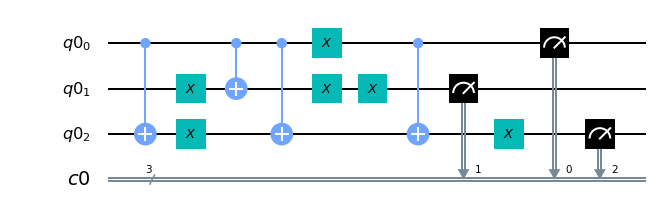

In [10]:
#plotting the circ 
%matplotlib inline 
circ.draw(output = 'mpl')